In [11]:
import sys
sys.path.append('../src/')
from xpcs import *
from sims import *

from scipy.signal import correlate2d 
import cv2

%matplotlib notebook

# Program for Simulating Speckle Formation by Free Space Propagation

<IPython.core.display.Javascript object>


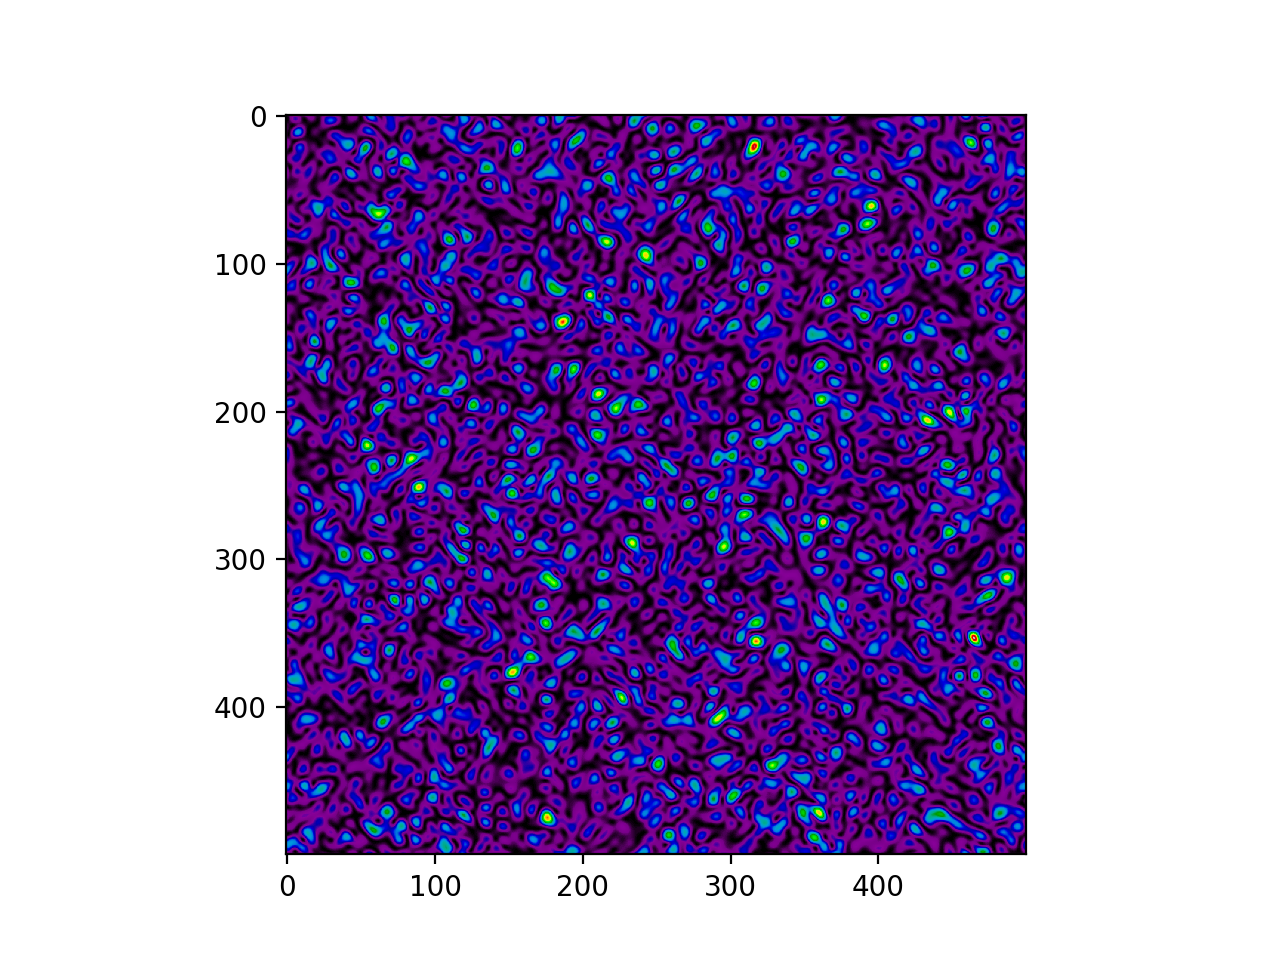

<function matplotlib.pyplot.show(*, block=None)>

In [17]:
# Linear dimension of the nxn array to be used.
# The user can change this number.
n = 500

# Number of samples (in one dimension) per speckle. 
# The user can change this number.
k = 8

# Dynamical Parameters
timesteps = 1000 # Number of Time Steps
dt = 0.25 # Time Step Size
D = 0.01 # Diffusion coefficient
dx = 1 # Grid spacing

# Generate an n/k x n/k array of random phasors
start =  np.exp(1j*2*np.pi*np.random.random((n//k,n//k)))

# Pad the phasor array with zeros. The scattering spot is a square of size n/k x n/k.
scatteredarray = np.pad(start,(0,n-n//k),mode='constant')

# Find the FFT of the padded array. This is the speckle field in the observation plane. 
specklefield = np.fft.fft2(scatteredarray)

# Find the intensity of the observed speckle field.
speckleintensity = np.abs(specklefield)**2


# Plotting
%matplotlib notebook

fig,ax = plt.subplots()
ax.imshow(speckleintensity,'nipy_spectral')
plt.show

<IPython.core.display.Javascript object>


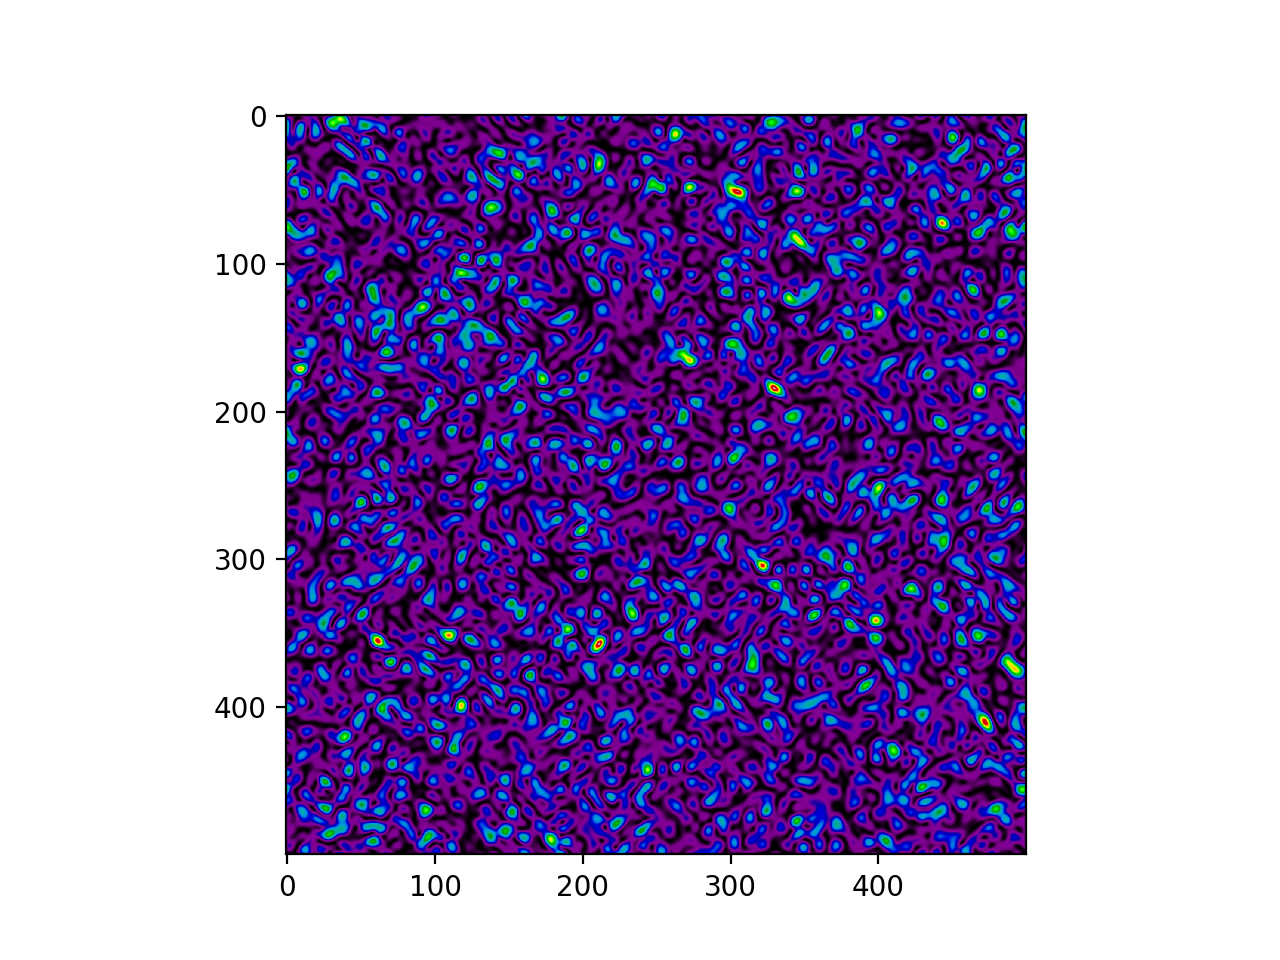

<function matplotlib.pyplot.show(*, block=None)>

In [18]:
# Generate an n/k x n/k array of random phasors
end =  np.exp(1j*2*np.pi*np.random.random((n//k,n//k)))

# Pad the phasor array with zeros. The scattering spot is a square of size n/k x n/k.
scatteredarray_end = np.pad(end,(0,n-n//k),mode='constant')

# Find the FFT of the padded array. This is the speckle field in the observation plane. 
specklefield_end = np.fft.fft2(scatteredarray_end)

# Find the intensity of the observed speckle field.
speckleintensity_end = np.abs(specklefield_end)**2

# Plotting
%matplotlib notebook

fig,ax = plt.subplots()
ax.imshow(speckleintensity_end,'nipy_spectral')
plt.show

In [19]:
diff = (end - start)/timesteps

m,n = speckleintensity.shape
speckle_movie = np.zeros((timesteps+1,m,n))

speckle_movie[0,:,:]+=speckleintensity

for t in range(timesteps):
    
    start += diff
    scatteredarray_inc = np.pad(start,(0,n-n//k),mode='constant')
    specklefield_inc = np.fft.fft2(scatteredarray_inc)
    speckleintensity_inc = np.abs(specklefield_inc)**2
    
    speckle_movie[t+1,:,:]+=speckleintensity_inc
    
np.save('test_speckle.npy',speckle_movie)

diff = (gay - speckleintensity)/timesteps

m,n = speckleintensity.shape
speckle_movie = np.zeros((timesteps+1,m,n))

speckle_movie[0,:,:]+=speckleintensity

for t in range(timesteps):

    speckle_movie[t+1,:,:]+=speckle_movie[t,:,:]+diff
    
fig,ax = plt.subplots()

fps = 10

frames = np.arange(1,len(speckle_movie))
make_detector_movie(speckle_movie,frames,1,fig,ax,'test',fps)    

# Generate an n/k x n/k array of random phasors
end =  np.exp(1j*2*np.pi*np.random.random((n//k,n//k)))

# Pad the phasor array with zeros. The scattering spot is a square of size n/k x n/k.
scatteredarray_end = np.pad(end,(0,n-n//k),mode='constant')

# Find the FFT of the padded array. This is the speckle field in the observation plane. 
specklefield_end = np.fft.fft2(scatteredarray_end)

# Find the intensity of the observed speckle field.
speckleintensity_end = np.abs(specklefield_end)**2

# Plotting
%matplotlib notebook

fig,ax = plt.subplots()
ax.imshow(speckleintensity_end,'nipy_spectral')
plt.show

diff = (end - start)/timesteps

m,n = speckleintensity.shape
speckle_movie = np.zeros((timesteps+1,m,n))

speckle_movie[0,:,:]+=speckleintensity

for t in range(timesteps):
    
    start += diff
    scatteredarray_inc = np.pad(start,(0,n-n//k),mode='constant')
    specklefield_inc = np.fft.fft2(scatteredarray_inc)
    speckleintensity_inc = np.abs(specklefield_inc)**2
    
    speckle_movie[t+1,:,:]+=speckleintensity_inc
    
fig,ax = plt.subplots()

fps = 10

frames = np.arange(1,len(speckle_movie))
make_detector_movie(speckle_movie,frames,1,fig,ax,'test',fps,scale='not log')    

<IPython.core.display.Javascript object>


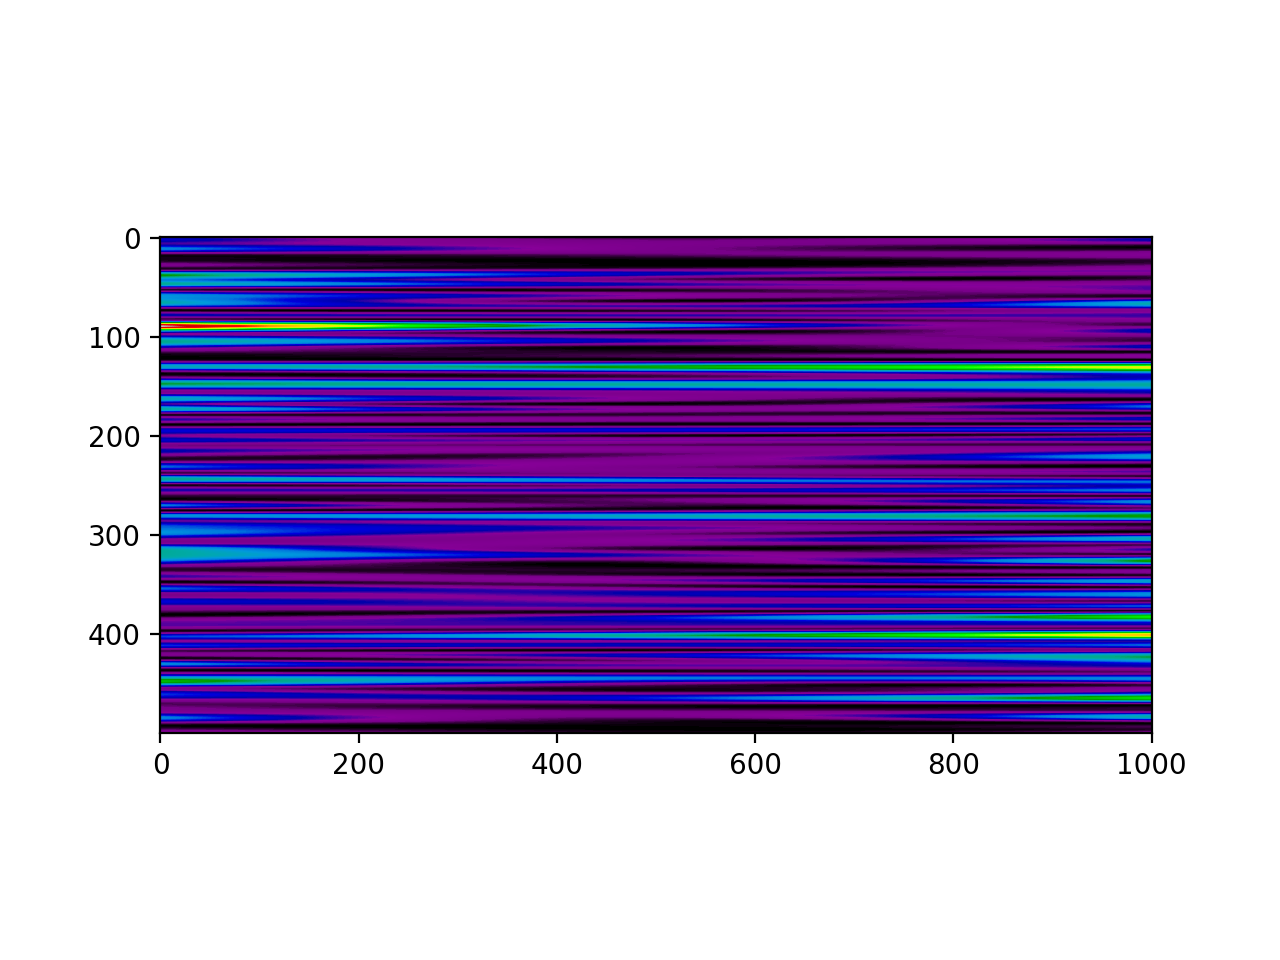

<function matplotlib.pyplot.show(*, block=None)>

In [20]:
# Plotting
%matplotlib notebook
fig,ax = plt.subplots()
ax.imshow(speckle_movie[:,n//2,:].T,'nipy_spectral')
plt.show



# Get Shape of Speckle Array
m,n = speckleintensity.shape

# Plotting
%matplotlib notebook
fig,ax = plt.subplots()
ax.plot(speckleintensity[m//2,:])
plt.show

# Brownian Motion Simulation

m,n = speckleintensity.shape
speckle_movie = np.zeros((timesteps+1,m,n))

speckle_movie[0,:,:]+=speckleintensity

# Time evolution loop
for t in range(timesteps):
    # Update the phases over time (this is where dynamics are introduced)
    phase_shift = np.exp(1j * 2 * np.pi * dt * 0.75*(np.random.random((n // k, n // k)) - 0.5))
    evolving_phasors = start * phase_shift
    
    # Pad the updated array
    scatteredarray = np.pad(evolving_phasors, (0, n - n // k), mode='constant')
    
    # Compute the FFT to get the speckle pattern at time t
    specklefield = np.fft.fft2(scatteredarray)
    speckleintensity = np.abs(specklefield)**2
    speckle_movie[t+1,:,:]+=speckleintensity

fig,ax = plt.subplots()

fps = 5

frames = np.arange(1,len(speckle_movie))
make_detector_movie(speckle_movie,frames,dt,fig,ax,'test',fps)

# Diffusion Simulation

m,n = speckleintensity.shape
speckle_movie_diff = np.zeros((timesteps+1,m,n))

speckle_movie_diff[0,:,:]+=speckleintensity

# Time evolution loop
for t in range(timesteps):
    # Apply diffusion to the phase
    real_part = apply_diffusion(scatteredarray.real, D, dt, dx)
    imag_part = apply_diffusion(scatteredarray.imag, D, dt, dx)
    
    # Reconstruct the complex field
    scatteredarray = real_part + 1j * imag_part
    
    # Compute the FFT to get the speckle pattern at time t
    specklefield = np.fft.fft2(scatteredarray)
    speckleintensity = np.abs(specklefield)**2
    speckle_movie_diff[t+1,:,:]+=speckleintensity
    
    # Plot the speckle pattern
    fig.clf()
    ax.imshow(speckleintensity, cmap='nipy_spectral')
    #ax.title(f"Speckle Pattern at t = {t * dt}")
    plt.pause(0.1)


fig,ax = plt.subplots()

fps = 4

frames = np.arange(1,len(speckle_movie_diff))
make_detector_movie(speckle_movie_diff,frames,dt,fig,ax,'test',fps)